<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/groupassignment2025retry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train Data Shape: (22491, 35)
Test Data Shape: (16000, 36)

Train Data Head:
  tappingsteelgrade   force_meas     speed  entrytemperature  \
0          GL4G71R1  58204143.19  2.634871       1000.661121   
1          GL4G71R1  53211949.94  3.947747       1020.846126   
2          JV7P1BP6  43513598.87  1.573130        829.078290   
3          JT5P31P2  33293124.30  2.979649        736.655045   
4          JT5P32P1  68174217.63  3.401038        893.722030   

   entrytemperaturebot  entrytemperaturecore  entrytemperaturetop  \
0           939.942163           1034.327117           916.847574   
1           991.621746           1044.907925           975.227384   
2           786.696648            857.833946           763.533963   
3           734.483511            738.987016           730.511453   
4           867.859688            913.164933           850.840106   

   entrythickness  entrywidth  exitthickness  ...  pctni    pcto    pctp  \
0        0.080232    3.496171       0.065490  .

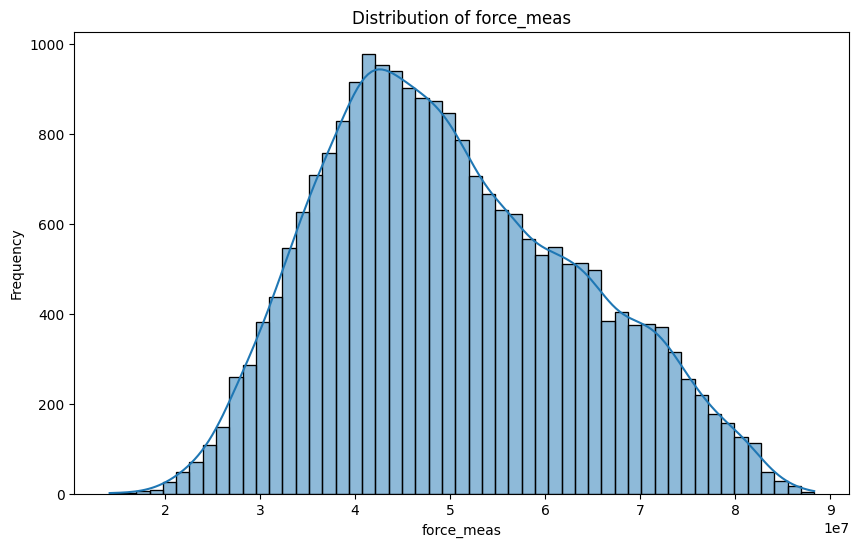

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Colab/Jupyter Notebook
%matplotlib inline

# Load the datasets (ensure the CSV files are uploaded to your Colab workspace)
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Display basic information about the datasets
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)

print("\nTrain Data Head:")
print(train_df.head())

print("\nTrain Data Description:")
print(train_df.describe())

print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())

# Optional: Visualize the distribution of the target variable (force_meas)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['force_meas'], kde=True)
plt.title('Distribution of force_meas')
plt.xlabel('force_meas')
plt.ylabel('Frequency')
plt.show()


In [2]:
# 1. Handle Missing Values
# Since only a few rows have missing values, we can drop them for simplicity
print("Number of rows before dropping missing values:", train_df.shape[0])
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
print("Number of rows after dropping missing values:", train_df.shape[0])

# 2. Remove columns if necessary (this is optional; here we keep all for demonstration)
# Example: If there's an obviously useless column like an ID, we could do:
# train_df.drop(columns=['some_id_column'], inplace=True, errors='ignore')
# test_df.drop(columns=['some_id_column'], inplace=True, errors='ignore')

# 3. Log transform the target variable for training deep neural networks
# We'll add a new column 'log_force_meas' to the training data
# This helps the neural network handle large target values more gracefully
train_df['log_force_meas'] = np.log(train_df['force_meas'])

# Just to confirm that we have no issues with negative or zero values
print("\nCheck if any force_meas <= 0:")
print((train_df['force_meas'] <= 0).sum())

print("\nSample of train_df after cleaning and adding log_force_meas:")
print(train_df[['force_meas', 'log_force_meas']].head())

# 4. Print final shape of train/test data
print("\nFinal Train Data Shape:", train_df.shape)
print("Final Test Data Shape:", test_df.shape)


Number of rows before dropping missing values: 22491
Number of rows after dropping missing values: 22490

Check if any force_meas <= 0:
0

Sample of train_df after cleaning and adding log_force_meas:
    force_meas  log_force_meas
0  58204143.19       17.879467
1  53211949.94       17.789794
2  43513598.87       17.588584
3  33293124.30       17.320861
4  68174217.63       18.037577

Final Train Data Shape: (22490, 36)
Final Test Data Shape: (16000, 36)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select feature columns (excluding the target variable)
feature_columns = [col for col in train_df.columns if col not in ['force_meas', 'log_force_meas']]
print("Selected feature columns:", feature_columns)

# Define input features and target variable (using the log-transformed target)
X = train_df[feature_columns]
y = train_df['log_force_meas']

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("\nFeature scaling completed. Sample of scaled training features:")
print(X_train_scaled[:5])


Selected feature columns: ['tappingsteelgrade', 'speed', 'entrytemperature', 'entrytemperaturebot', 'entrytemperaturecore', 'entrytemperaturetop', 'entrythickness', 'entrywidth', 'exitthickness', 'zeropoint', 'radius', 'pctal', 'pctb', 'pctc', 'pctca', 'pctco', 'pctcr', 'pctcu', 'pcth', 'pctmg', 'pctmn', 'pctmo', 'pctn', 'pctnb', 'pctni', 'pcto', 'pctp', 'pcts', 'pctsi', 'pctsn', 'pctti', 'pctv', 'pctzr', 'fur_line_no']
Training set shape: (17992, 34)
Validation set shape: (4498, 34)


ValueError: could not convert string to float: 'JT5P31P6'